<a href="https://colab.research.google.com/github/Parths131/customer-segmentation/blob/main/customer_segmentation_phaseB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rfm.csv to rfm.csv


In [ ]:
rfm = pd.read_csv('/content/rfm.csv')

In [ ]:
print(rfm.shape)

(4338, 4)


In [ ]:
rfm.head()

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
rfm_scaled = rfm.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled[['InvoiceDate', 'Invoice', 'TotalPrice']])

In [ ]:
rfm_scaled.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,2.329388,-0.424733,8.358668
1,12347.0,-0.900588,0.353949,0.250966
2,12348.0,-0.170593,-0.035392,-0.028596
3,12349.0,-0.740589,-0.424733,-0.033012
4,12350.0,2.179389,-0.424733,-0.191348


In [ ]:
rfm_scaled.drop(['InvoiceDate', 'Invoice', 'TotalPrice'], axis=1, inplace=True)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
inertia = []
K_range = range(1, 11)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled[['Recency', 'Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

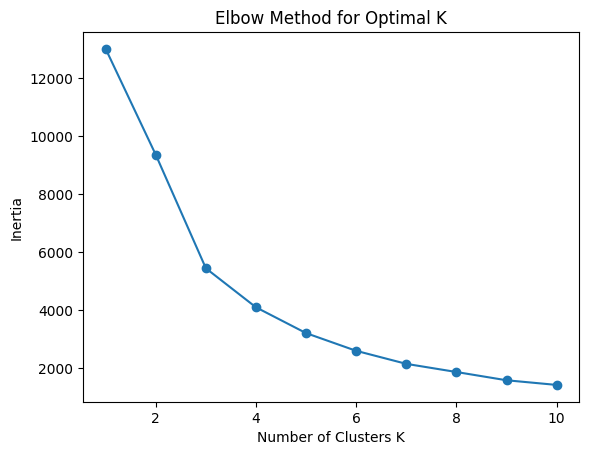

In [ ]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
K_range = range(2, 11)

In [ ]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled[['Recency', 'Frequency', 'Monetary']])
    score = silhouette_score(rfm_scaled[['Recency', 'Frequency', 'Monetary']], labels)
    silhouette_scores.append(score)

Text(0.5, 1.0, 'Silhouette Scores for K')

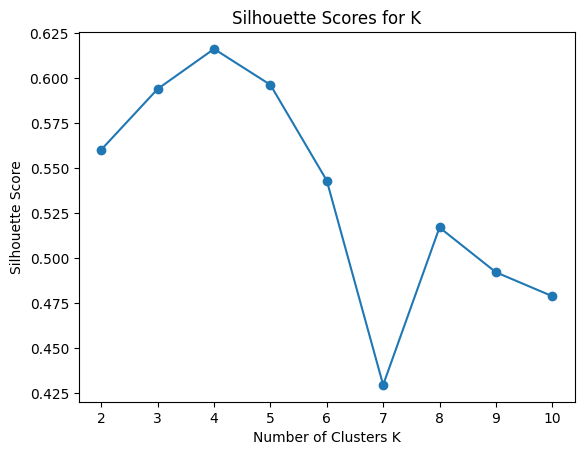

In [ ]:
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K')

In [ ]:
final_k = 4

In [ ]:
kmeans = KMeans(n_clusters=final_k, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

In [ ]:
rfm_scaled.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)

Recency        Frequency        Monetary             
           mean median      mean median     mean median count
Cluster                                                      
0          -0.5   -0.6      -0.1   -0.2     -0.1   -0.1  3053
1           1.6    1.5      -0.4   -0.4     -0.2   -0.2  1061
2          -0.9   -0.9      10.2    7.6     13.9   12.8    13
3          -0.8   -0.9       2.3    1.9      1.2    0.6   211

In [ ]:
rfm_scaled.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,2.329388,-0.424733,8.358668,3
1,12347.0,-0.900588,0.353949,0.250966,0
2,12348.0,-0.170593,-0.035392,-0.028596,0
3,12349.0,-0.740589,-0.424733,-0.033012,0
4,12350.0,2.179389,-0.424733,-0.191348,1


In [ ]:
rfm.head()

,Customer ID,InvoiceDate,Invoice,TotalPrice
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [ ]:
rfm_unscaled = rfm.copy()

In [ ]:
clusters = rfm_scaled[['Customer ID', 'Cluster']]

In [ ]:
final_rfm = pd.merge(rfm_unscaled, clusters, on='Customer ID')

In [ ]:
final_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [ ]:
final_rfm.to_csv('rfm_with_clusters.csv', index=False)

In [ ]:
final_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,3,7,4310.00,0
2,12348.0,76,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,311,1,334.40,1
